# Importing Library

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Data Preprocessing

In [39]:
Columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SM1", "SM2", "SM3", "SM4", "SM5", "SM6", "SM7", "SM8", "SM9", "SM10", "SM11", "SM12", "SM13", "SM14", "SM15", "SM16", "SM17", "SM18", "SM19", "SM20", "SM21"]

#For FD001
raw_data1 = pd.read_csv("Dataset/train_FD001.txt", sep =' ', header=None)
raw_data1 = raw_data1.drop([26,27], axis="columns")
raw_data1.columns = Columns

#For FD002
raw_data2 = pd.read_csv("Dataset/train_FD002.txt", sep =' ', header=None)
raw_data2 = raw_data2.drop([26,27], axis="columns")
raw_data2.columns = Columns

#For FD003
raw_data3 = pd.read_csv("Dataset/train_FD003.txt", sep =' ', header=None)
raw_data3 = raw_data3.drop([26,27], axis="columns")
raw_data3.columns = Columns

#For FD004
raw_data4 = pd.read_csv("Dataset/train_FD004.txt", sep =' ', header=None)
raw_data4 = raw_data4.drop([26,27], axis="columns")
raw_data4.columns = Columns


In [40]:
raw_data1[raw_data1["ID"]==1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [41]:
EOL = []
for m in raw_data1["ID"]:
    EOL.append((raw_data1[raw_data1["ID"] == m]["Cycle"]).values[-1])
raw_data1["EOL"] = EOL

EOL = []
for m in raw_data2["ID"]:
    EOL.append((raw_data2[raw_data2["ID"] == m]["Cycle"]).values[-1])
raw_data2["EOL"] = EOL

EOL = []
for m in raw_data3["ID"]:
    EOL.append((raw_data3[raw_data3["ID"] == m]["Cycle"]).values[-1])
raw_data3["EOL"] = EOL

EOL = []
for m in raw_data4["ID"]:
    EOL.append((raw_data4[raw_data4["ID"] == m]["Cycle"]).values[-1])
raw_data4["EOL"] = EOL

raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [42]:
raw_data1["Life_Ratio"] = raw_data1["Cycle"].div(raw_data1["EOL"])
raw_data2["Life_Ratio"] = raw_data2["Cycle"].div(raw_data2["EOL"])
raw_data3["Life_Ratio"] = raw_data3["Cycle"].div(raw_data3["EOL"])
raw_data4["Life_Ratio"] = raw_data4["Cycle"].div(raw_data4["EOL"])

raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,EOL,Life_Ratio
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,0.980000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,0.985000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,0.990000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,0.995000


In [43]:
Label = []
for index, row in raw_data1.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif  row["Life_Ratio"] < 0.8:
        Label.append(1)
    else:
        Label.append(2)

raw_data1["Label"] = Label

Label = []
for index, row in raw_data2.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif  row["Life_Ratio"] < 0.8:
        Label.append(1)
    else:
        Label.append(2)

raw_data2["Label"] = Label

Label = []
for index, row in raw_data3.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif  row["Life_Ratio"] < 0.8:
        Label.append(1)
    else:
        Label.append(2)

raw_data3["Label"] = Label

Label = []
for index, row in raw_data4.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif  row["Life_Ratio"] < 0.8:
        Label.append(1)
    else:
        Label.append(2)

raw_data4["Label"] = Label

raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM15,SM16,SM17,SM18,SM19,SM20,SM21,EOL,Life_Ratio,Label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,0.980000,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,0.985000,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,0.990000,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,0.995000,2


In [44]:
raw_data1 = raw_data1.drop(columns=["Life_Ratio", "EOL", "ID"])
raw_data2 = raw_data2.drop(columns=["Life_Ratio", "EOL", "ID"])
raw_data3 = raw_data3.drop(columns=["Life_Ratio", "EOL", "ID"])
raw_data4 = raw_data4.drop(columns=["Life_Ratio", "EOL", "ID"])

raw_data1

,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,SM6,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,Label
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


## Saving the Processed Data

In [98]:
raw_data1.to_csv("Processed Data/train_FD001_Processed.csv", index=False)
raw_data2.to_csv("Processed Data/train_FD002_Processed.csv", index=False)
raw_data3.to_csv("Processed Data/train_FD003_Processed.csv", index=False)
raw_data4.to_csv("Processed Data/train_FD004_Processed.csv", index=False)


# Combining the all the Data

In [99]:
Final_Data = pd.concat([raw_data1, raw_data2, raw_data3, raw_data4])
Final_Data

Final_Data.to_csv("Processed Data/Combined_train_Processed.csv", index=False)

# Random Forest Model Training

In [92]:
X = Final_Data.iloc[:, :-1]
y = Final_Data.iloc[:, -1]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [94]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

# Performance Evaluation

0.8933649289099526

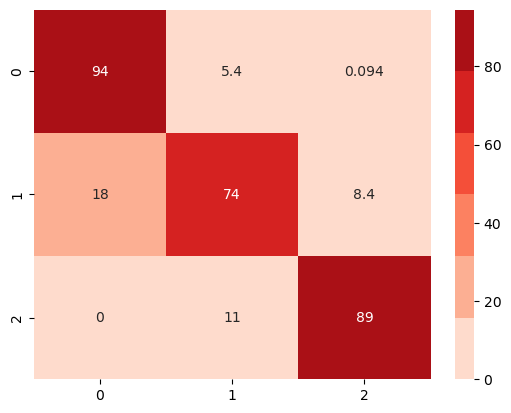

In [50]:
y_pred_RF = RF.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

# Preperation of Test Data

In [80]:
Columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SM1", "SM2", "SM3", "SM4", "SM5", "SM6", "SM7", "SM8", "SM9", "SM10", "SM11", "SM12", "SM13", "SM14", "SM15", "SM16", "SM17", "SM18", "SM19", "SM20", "SM21"]

#For FD001
test_raw_data1 = pd.read_csv("Dataset/test_FD001.txt", sep =' ', header=None)
RUL_Data1 = pd.read_csv("Dataset/RUL_FD001.txt", sep = ' ', header=None)
RUL_Data1 = RUL_Data1.drop([1], axis='columns')
RUL_Data1.columns = ["EOL"]
test_raw_data1 = test_raw_data1.drop([26,27], axis="columns")
test_raw_data1.columns = Columns

#For FD002
test_raw_data2 = pd.read_csv("Dataset/test_FD002.txt", sep =' ', header=None)
RUL_Data2 = pd.read_csv("Dataset/RUL_FD002.txt", sep = ' ', header=None)
RUL_Data2 = RUL_Data2.drop([1], axis='columns')
RUL_Data2.columns = ["EOL"]
test_raw_data2 = test_raw_data2.drop([26,27], axis="columns")
test_raw_data2.columns = Columns

#For FD003
test_raw_data3 = pd.read_csv("Dataset/test_FD003.txt", sep =' ', header=None)
RUL_Data3 = pd.read_csv("Dataset/RUL_FD003.txt", sep = ' ', header=None)
RUL_Data3 = RUL_Data3.drop([1], axis='columns')
RUL_Data3.columns = ["EOL"]
test_raw_data3 = test_raw_data3.drop([26,27], axis="columns")
test_raw_data3.columns = Columns

#For FD004
test_raw_data4 = pd.read_csv("Dataset/test_FD004.txt", sep =' ', header=None)
RUL_Data4 = pd.read_csv("Dataset/RUL_FD004.txt", sep = ' ', header=None)
RUL_Data4 = RUL_Data4.drop([1], axis='columns')
RUL_Data4.columns = ["EOL"]
test_raw_data4 = test_raw_data4.drop([26,27], axis="columns")
test_raw_data4.columns = Columns

In [81]:
test_raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [82]:
RUL_Data1

,EOL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


## Combining the RUL Data with the test file to create the Label Section

In [84]:
EOL = []
for m in test_raw_data1["ID"]:
    EOL.append((test_raw_data1[test_raw_data1["ID"] == m]["Cycle"]).values[-1])
test_raw_data1["EOL"] = EOL

EOL = []
for m in test_raw_data2["ID"]:
    EOL.append((test_raw_data2[test_raw_data2["ID"] == m]["Cycle"]).values[-1])
test_raw_data2["EOL"] = EOL

EOL = []
for m in test_raw_data3["ID"]:
    EOL.append((test_raw_data3[test_raw_data3["ID"] == m]["Cycle"]).values[-1])
test_raw_data3["EOL"] = EOL

EOL = []
for m in test_raw_data4["ID"]:
    EOL.append((test_raw_data4[test_raw_data4["ID"] == m]["Cycle"]).values[-1])
test_raw_data4["EOL"] = EOL

test_raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,EOL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,198
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,198
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,198
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,198


In [85]:
EOL = []
for index,row in test_raw_data1.iterrows():
    EOL.append(RUL_Data1.loc[int(row["ID"]-1), "EOL"])
test_raw_data1["EOL"] = test_raw_data1["EOL"] + EOL

EOL = []
for index,row in test_raw_data2.iterrows():
    EOL.append(RUL_Data2.loc[int(row["ID"]-1), "EOL"])
test_raw_data2["EOL"] = test_raw_data2["EOL"] + EOL

EOL = []
for index,row in test_raw_data3.iterrows():
    EOL.append(RUL_Data3.loc[int(row["ID"]-1), "EOL"])
test_raw_data3["EOL"] = test_raw_data3["EOL"] + EOL

EOL = []
for index,row in test_raw_data4.iterrows():
    EOL.append(RUL_Data4.loc[int(row["ID"]-1), "EOL"])
test_raw_data4["EOL"] = test_raw_data4["EOL"] + EOL

test_raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,EOL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,218
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,218
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,218
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,218


In [86]:
test_raw_data1["Life_Ratio"] = test_raw_data1["Cycle"].div(test_raw_data1["EOL"])
test_raw_data2["Life_Ratio"] = test_raw_data2["Cycle"].div(test_raw_data2["EOL"])
test_raw_data3["Life_Ratio"] = test_raw_data3["Cycle"].div(test_raw_data3["EOL"])
test_raw_data4["Life_Ratio"] = test_raw_data4["Cycle"].div(test_raw_data4["EOL"])

test_raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,EOL,Life_Ratio
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143,0.006993
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143,0.013986
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143,0.020979
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143,0.027972
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143,0.034965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,218,0.889908
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,218,0.894495
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,218,0.899083
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,218,0.903670


In [87]:
Label = []
for index, row in test_raw_data1.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif row["Life_Ratio"] <0.8:
        Label.append(1)
    else:
        Label.append(2)
test_raw_data1["Label"] = Label

Label = []
for index, row in test_raw_data2.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif row["Life_Ratio"] <0.8:
        Label.append(1)
    else:
        Label.append(2)
test_raw_data2["Label"] = Label

Label = []
for index, row in test_raw_data3.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif row["Life_Ratio"] <0.8:
        Label.append(1)
    else:
        Label.append(2)
test_raw_data3["Label"] = Label

Label = []
for index, row in test_raw_data4.iterrows():
    if row["Life_Ratio"] < 0.6:
        Label.append(0)
    elif row["Life_Ratio"] <0.8:
        Label.append(1)
    else:
        Label.append(2)
test_raw_data4["Label"] = Label

test_raw_data1

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM15,SM16,SM17,SM18,SM19,SM20,SM21,EOL,Life_Ratio,Label
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,143,0.006993,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,143,0.013986,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,143,0.020979,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,143,0.027972,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,143,0.034965,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,218,0.889908,2
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,218,0.894495,2
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,218,0.899083,2
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,218,0.903670,2


In [88]:
test_raw_data1 = test_raw_data1.drop(columns=["ID", "EOL", "Life_Ratio"])
test_raw_data2 = test_raw_data2.drop(columns=["ID", "EOL", "Life_Ratio"])
test_raw_data3 = test_raw_data3.drop(columns=["ID", "EOL", "Life_Ratio"])
test_raw_data4 = test_raw_data4.drop(columns=["ID", "EOL", "Life_Ratio"])

test_raw_data1

,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,SM6,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,Label
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,2
13092,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,2
13093,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2
13094,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,2


In [100]:
Final_TestData = pd.concat([test_raw_data1, test_raw_data2, test_raw_data3, test_raw_data4])
Final_TestData

,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,SM6,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,Label
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,...,2388.50,8112.61,9.4427,0.02,331,2212,100.0,10.53,6.2620,2
41210,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,...,2388.33,8086.83,9.2772,0.02,366,2324,100.0,24.33,14.6486,2
41211,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,...,2388.64,8100.84,9.3982,0.02,336,2223,100.0,14.69,8.8389,2
41212,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,...,2388.37,8085.24,9.2727,0.03,366,2324,100.0,24.44,14.6887,2


## Saving the Test Processed Data

In [103]:
test_raw_data1.to_csv("Processed Data/test_FD001_Processed.csv", index=False)
test_raw_data2.to_csv("Processed Data/test_FD002_Processed.csv", index=False)
test_raw_data3.to_csv("Processed Data/test_FD003_Processed.csv", index=False)
test_raw_data4.to_csv("Processed Data/test_FD004_Processed.csv", index=False)
Final_TestData.to_csv("Processed Data/Combined_test_Processed.csv", index=False)

# Testing the Random Forest Model for the Test Dataset

In [101]:
X_test = Final_TestData.iloc[:, :-1]
y_test = Final_TestData.iloc[:, -1]

0.9066894191444941

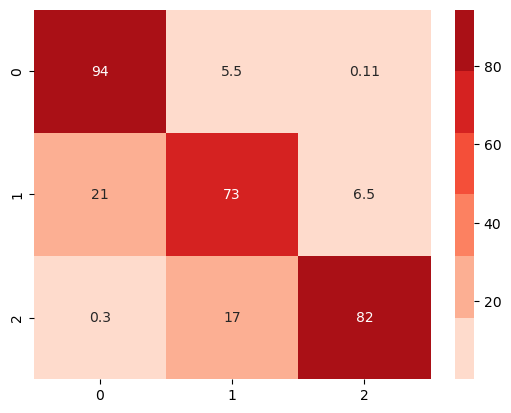

In [102]:
y_pred_RF = RF.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)